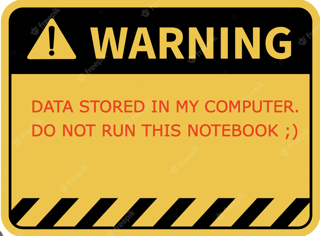

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
trans = pd.read_csv('transactions.csv')
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')

# Artricles

## Table Overview

In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
for n in articles.columns :
    uniqule_num = articles[n].nunique()
    print(f' number of unique {n}: {uniqule_num}')

 number of unique article_id: 105542
 number of unique product_code: 47224
 number of unique prod_name: 45875
 number of unique product_type_no: 132
 number of unique product_type_name: 131
 number of unique product_group_name: 19
 number of unique graphical_appearance_no: 30
 number of unique graphical_appearance_name: 30
 number of unique colour_group_code: 50
 number of unique colour_group_name: 50
 number of unique perceived_colour_value_id: 8
 number of unique perceived_colour_value_name: 8
 number of unique perceived_colour_master_id: 20
 number of unique perceived_colour_master_name: 20
 number of unique department_no: 299
 number of unique department_name: 250
 number of unique index_code: 10
 number of unique index_name: 10
 number of unique index_group_no: 5
 number of unique index_group_name: 5
 number of unique section_no: 57
 number of unique section_name: 56
 number of unique garment_group_no: 21
 number of unique garment_group_name: 21
 number of unique detail_desc: 4340

## Category Overview

In [ ]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

## Product offer Overview

The important category in terms of number of products are Ladieswear, followed by baby/kids and Divided. 

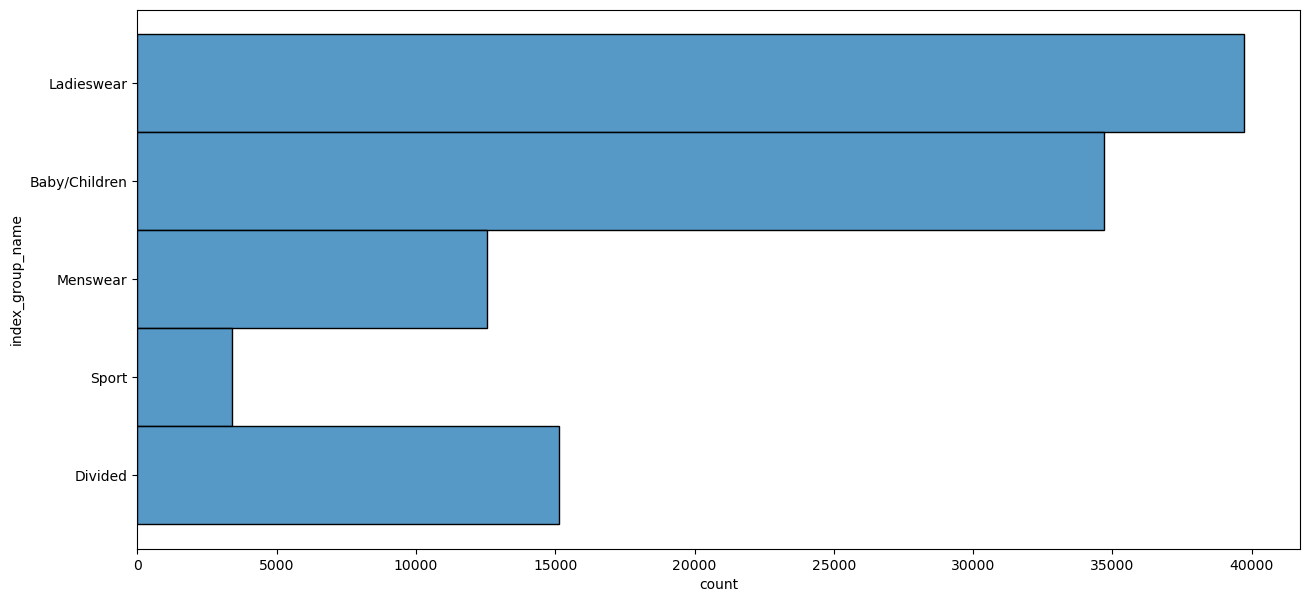

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_group_name')
ax.set_xlabel('count')
ax.set_ylabel('index_group_name')
plt.show()


# Customers

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


## Active Customers vs Inactive

In [ ]:
customers['Active'].unique()

array([0., 1.])

In [ ]:
customers['Active'].fillna(0, inplace=True)

In [ ]:
count_active = (customers['Active'] == 1).sum() 
count_inactive = (customers['Active'] == 0).sum() 
print(count_active)
print(count_inactive)

464404
907576


([<matplotlib.patches.Wedge at 0x7fec577b9f10>,
 [Text(0.5344902734433419, 0.9614156996817047, 'number of active customer'),
  Text(-0.534490183429106, -0.9614157497242911, 'number of inactive customer')],
 [Text(0.29154014915091375, 0.524408563462748, '33.8%'),
  Text(-0.2915401000522396, -0.5244085907587042, '66.2%')])

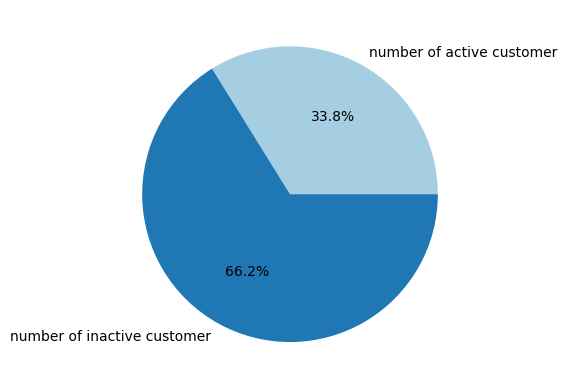

In [ ]:
# Create a list of values to plot
values = [count_active,count_inactive]
# Create a list of labels for the values
labels = ['number of active customer', 'number of inactive customer']
# Create a figure and axis object
fig, ax = plt.subplots()
# Create the pie chart
ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')

## Age Distribution

In [ ]:
median = customers['age'].median()

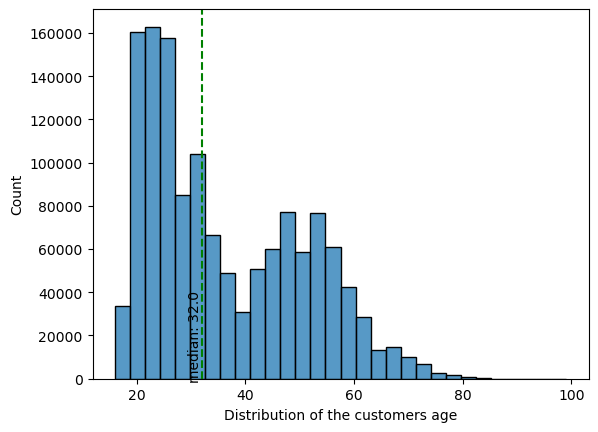

In [ ]:
ax = sns.histplot(data=customers, x='age',bins=30)
ax.set_xlabel('Distribution of the customers age')
ax.axvline(x=median, color="green", ls="--")
ax.text(median, 3.5, 'median: {}'.format(round(median,0)), rotation='vertical', ha='right')
plt.show()

## Active customers in age groups

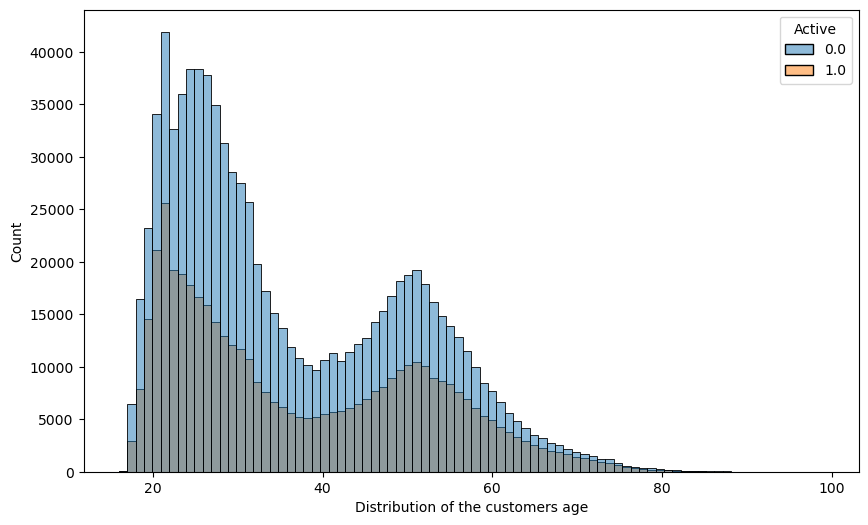

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.histplot(data=customers, x='age', bins=customers['age'].nunique(), hue='Active', stat="count")
ax.set_xlabel('Distribution of the customers age')
plt.show()

# Transaction

In [ ]:
trans.sample(5)

,t_dat,customer_id,article_id,price,sales_channel_id
2697964,2018-11-20,e26c7f8a6874dbf811ea7bf4cc8ea977fa5fe67c5caabf...,663396001,0.050831,2
9064099,2019-04-20,f9289f6fc2fef10d301d98711a997c8abbc0d2aea6bfc1...,554477028,0.014220,2
4955575,2019-01-13,c41559dc11bceb8b0f21700819e1ffc6e8f2ae357d7ac1...,678687012,0.022017,2
2387590,2018-11-11,fefbbcbdd0b74d5b70a8f74f7889b58a24976eb8a57f71...,537116001,0.015068,2
13031305,2019-06-30,8fb30c5a92d34336a83af999e4d342ba6f33efcb31d00b...,599580017,0.015864,1


## Price seems to be dummy

In [ ]:
trans.describe()['price']

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64

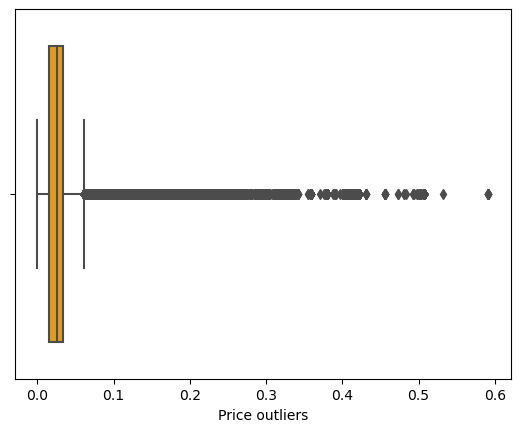

In [ ]:
ax = sns.boxplot(data=trans, x='price', color='orange')
ax.set_xlabel('Price outliers')
plt.show()

## Number of transaction per year

In [ ]:
trans['t_dat'] = pd.to_datetime(trans['t_dat'])
year_counts = trans['t_dat'].dt.year.value_counts()
year_counts

2019    16396930
2020    10980132
2018     4411262
Name: t_dat, dtype: int64

## 2/3 of trans are from online channels

In [ ]:
offline = (trans['sales_channel_id'] == 1).sum()
online = (trans['sales_channel_id'] == 2).sum()
print(online)
print(offline)

22379862
9408462


[Text(0, 0, 'offline'), Text(1, 0, 'online')]

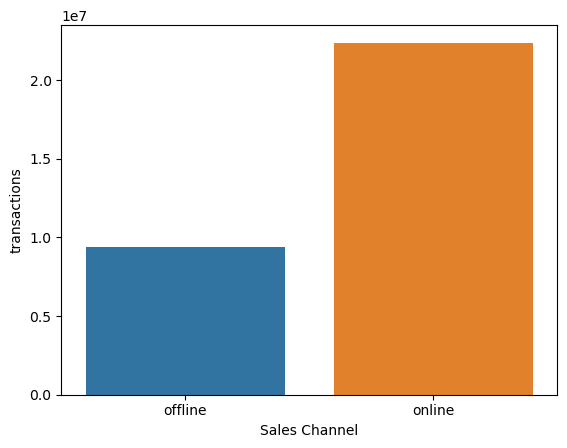

In [ ]:
ax1 = sns.countplot(x='sales_channel_id', data=trans)
ax1.set(xlabel='Sales Channel',ylabel='transactions')
ax1.set_xticklabels(['offline','online'])

## transactions period is 2018.10 - 2020.10

In [ ]:
trans["date"] = pd.to_datetime(trans["t_dat"])

In [ ]:
grouped = trans.groupby(['date']).agg(num_customers=('customer_id', 'count')).reset_index()

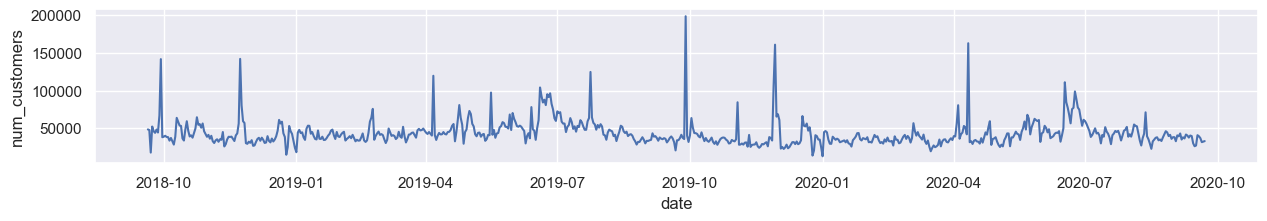

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as lines
import seaborn as sns



# Set the y-axis limits
ymin = 0
ymax = grouped["num_customers"].max() + 1000
ax.set_ylim(ymin, ymax)

# Set the x-axis limits
xmin = grouped.index.min()
xmax = grouped.index.max()
ax.set_xlim(xmin, xmax)

# Plot the data
#ax.plot(grouped.index, grouped["num_customers"])
sns.lineplot(data=grouped, x='date', y='num_customers')
                
# Add labels and title
# ax.set_xlabel("Date")
# ax.set_ylabel("Number of unique visits")

sns.set(rc={'figure.figsize':(15,2)})

plt.show()